# Data Mining & Business Intelligence
THIRD YEAR, SEMESTER ONE, END OF SEMESTER FINAL ASSESSMENT 

# GIDAGUI MOSES
# REG NO 2023-B071-21542


## Part A1: Load Dataset

In [1]:
import pandas as pd

df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")
print("Dataset Shape:", df.shape)
display(df.head(10))

Dataset Shape: (3928, 16)


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye
5,4670,Lagos,TDILIFE,TDILIFE,False,608043c969c51b4e80e70314,HOLLANDIA EVAP MILK FULL CREAM 120g X 24,2760.00,ML39SRTWZAW0QRQZCVEUBCGW,Delivered,1,1,2760.00,2021-05-31,Lagos,Ifako-Ijaye
6,4669,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2O0EB2MZNKSXAPFEKGG0JW,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
7,4669,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLJG03AA1NG0Y1EZBKFH88SG,Cancelled,1,1,4950.00,2021-05-31,Lagos,Alimosho
8,4668,Lagos,TDILIFE,TDILIFE,False,60b0cef62498ec1dd3805329,CHIVITA HAPPY HOUR - 150MLX24,1076.25,ML03X81AHZV026P0L0BCTSLW,Cancelled,1,1,1076.25,2021-05-31,Lagos,Alimosho
9,4668,Lagos,TDILIFE,TDILIFE,False,60b4d9352498ec1dd38053b6,CHIVITA ACTIVE 1LX10,4253.75,MLL1NIQOQDTEMWTIE07D20JW,Cancelled,1,1,4253.75,2021-05-31,Lagos,Alimosho


##  Part A2: Remove Duplicates & Handle Missing Values

In [2]:
df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")

df = df.drop_duplicates()

num_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("✅ Missing Values Handled")
display(df.isnull().sum())

✅ Missing Values Handled


Order ID             0
Branch Location      0
Branch Name          0
Business Name        0
Is Deleted           0
Item ID              0
Item Name            0
Item Price           0
Order Item Number    0
Item Status          0
Packed Quantity      0
Quantity             0
Total Price          0
Order Date           0
Order Region         0
Order Local Area     0
dtype: int64

##  Part A3: Normalise Purchase Value & Order Frequency

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")

purchase_col = "Total Price"
freq_col = "Quantity"

df[purchase_col] = pd.to_numeric(df[purchase_col], errors="coerce")
df[freq_col] = pd.to_numeric(df[freq_col], errors="coerce")

df[[purchase_col, freq_col]] = df[[purchase_col, freq_col]].fillna(
    df[[purchase_col, freq_col]].median()
)

scaler = MinMaxScaler()
df[[purchase_col, freq_col]] = scaler.fit_transform(df[[purchase_col, freq_col]])

print("✅ Normalization Successful")
display(df[[purchase_col, freq_col]].head())

✅ Normalization Successful


,Total Price,Quantity
0,0.000065,0.00000
1,0.000089,0.00012
2,0.000045,0.00000
3,0.000044,0.00000
4,0.000064,0.00000


##  Part A4: Encode Categorical Features

In [4]:
df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")

df_encoded = pd.get_dummies(df, drop_first=True)
print("✅ Encoding Complete")
display(df_encoded.head())

✅ Encoding Complete


,Order ID,Is Deleted,Item Price,Packed Quantity,Quantity,Total Price,Order Date,Branch Location_Ogun,Branch Location_Oyo,Branch Name_Deeski Store Limited,...,Order Local Area_Ikorodu Division,Order Local Area_Kosofe,Order Local Area_Lagos Island,Order Local Area_Lagos Mainland,Order Local Area_Mushin,Order Local Area_Ojo,Order Local Area_Oshodi-Isolo,Order Local Area_Shomolu,Order Local Area_Surulere,Order Local Area_Surulere Lagos State
0,4672,False,4950.00,1,1,4950.00,2021-05-31,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4672,False,3392.75,2,2,6785.50,2021-05-31,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4671,False,3392.75,1,1,3392.75,2021-05-31,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4670,False,3370.00,1,1,3370.00,2021-05-31,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4670,False,4845.00,1,1,4845.00,2021-05-31,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Part B1: Descriptive Statistics

In [5]:
df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")
display(df.describe())

,Order ID,Item Price,Packed Quantity,Quantity,Total Price,Order Date
count,3928.000000,3928.000000,3928.000000,3928.000000,3.928000e+03,3928
mean,3305.159369,7643.257449,55.991599,56.700356,4.539321e+05,2021-04-24 14:11:58.533604864
min,2209.000000,0.000000,0.000000,1.000000,0.000000e+00,2021-02-01 00:00:00
25%,2583.000000,3118.750000,1.000000,2.000000,8.976000e+03,2021-03-30 00:00:00
50%,3261.000000,7820.000000,5.000000,5.000000,2.160000e+04,2021-05-05 00:00:00
75%,3924.250000,9352.500000,20.000000,20.000000,1.225000e+05,2021-05-20 00:00:00
max,4672.000000,485000.000000,8306.000000,8306.000000,7.599990e+07,2021-05-31 00:00:00
std,732.639305,17091.002161,246.418906,246.467189,2.135920e+06,NaN


##  Part B2: Histograms & Boxplots

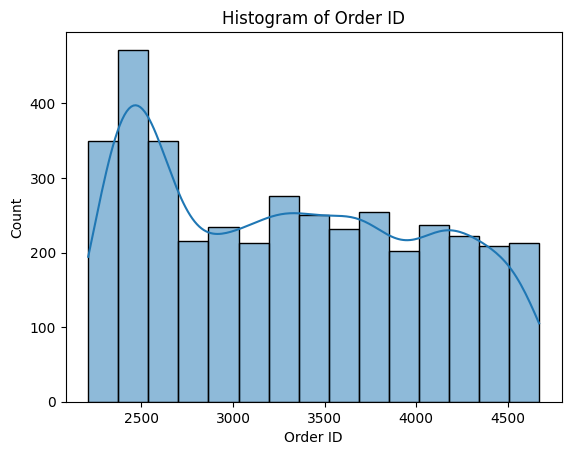

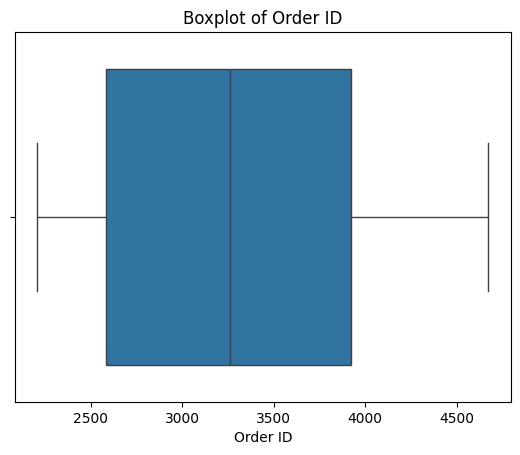

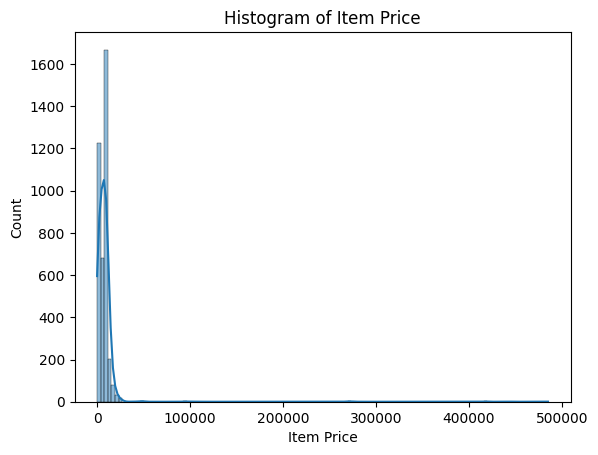

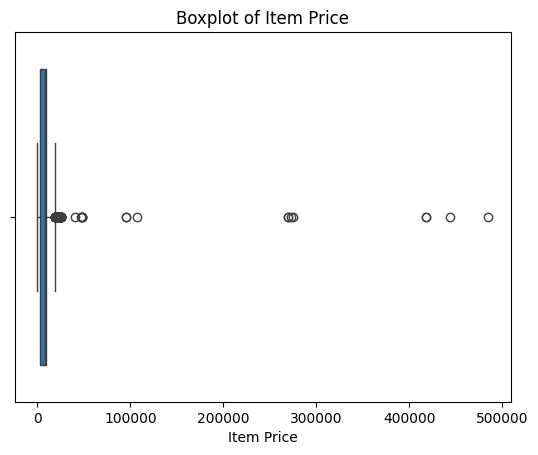

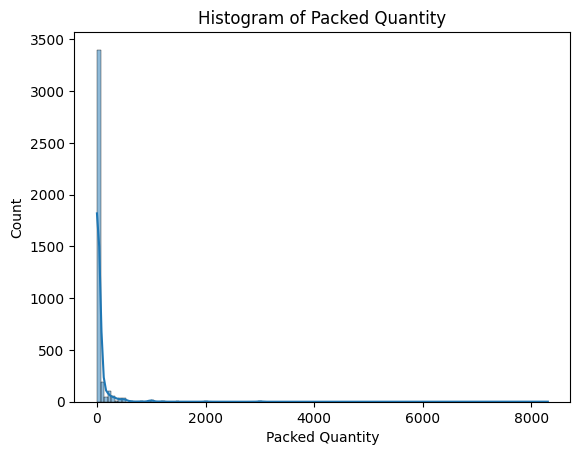

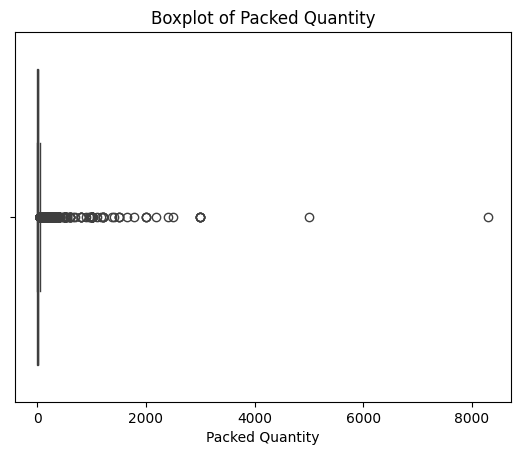

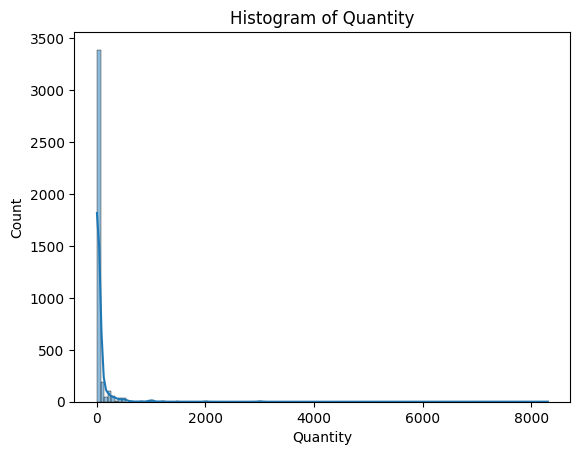

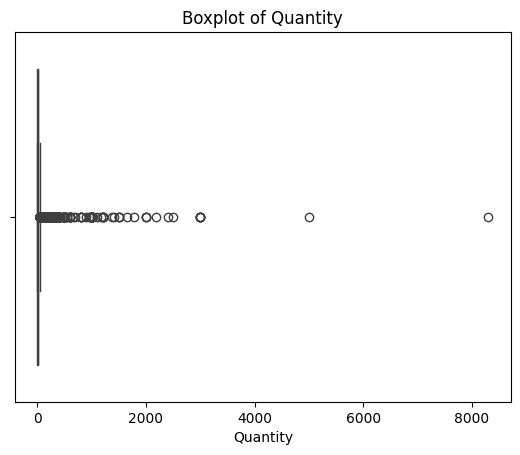

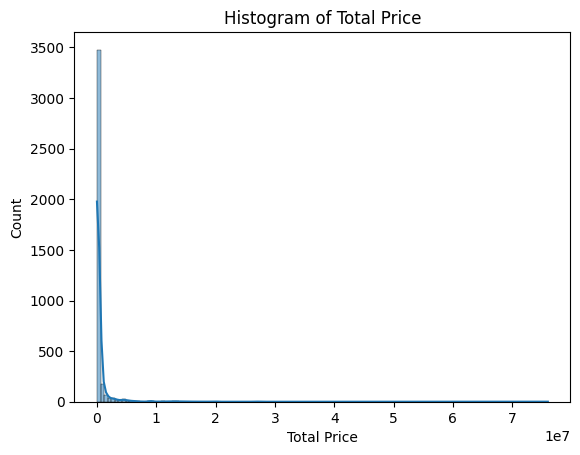

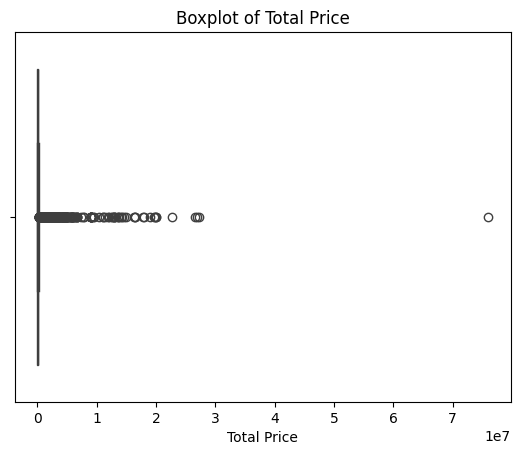

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")
num_cols = df.select_dtypes(include=["number"]).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

##  Part B3: Correlation Heatmap

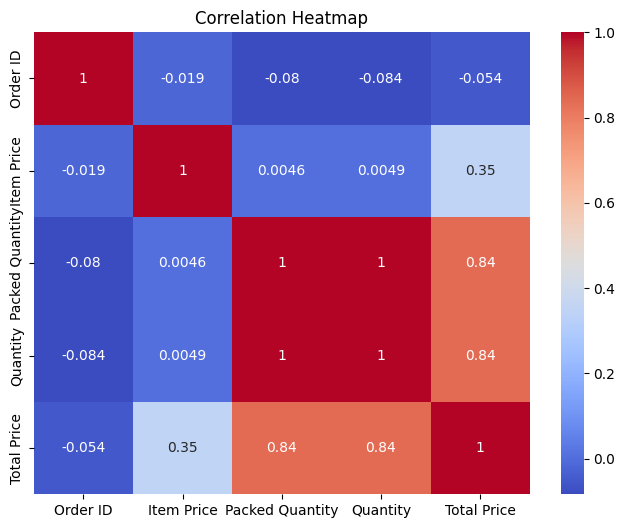

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Part B (4): Interpretation of Observed Trends and Anomalies

The Total Price and Quantity distributions are right-skewed, showing that most customers make small purchases, while a few customers place very large orders. The boxplots confirm the presence of outliers, representing high-spending and bulk-buying customers. 

The correlation heatmap shows a strong positive relationship between Quantity and Total Price, meaning higher quantities directly lead to higher spending. These patterns highlight the existence of distinct low-value and high-value customer segments.

##  Part C1: Feature Engineering

Create two derived features, such as Loyalty Index (frequency × average 
purchase value), Recency Score (days since last purchase), Customer Value Tier, 
and Engagement Score

In [8]:
import pandas as pd
import numpy as np
df = pd.read_excel("Nigerian E-Commerce Dataset.xlsx", engine="openpyxl")


# Ensure date format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Snapshot date for recency
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Aggregate at customer (Business Name) level
customer_df = df.groupby('Business Name').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                  # Frequency
    'Total Price': 'mean'                                   # Avg purchase value
}).reset_index()

customer_df.columns = ['business_name', 'recency_days', 'frequency', 'avg_purchase_value']

# 1. Loyalty Index
customer_df['loyalty_index'] = customer_df['frequency'] * customer_df['avg_purchase_value']

# 2. Recency Score
customer_df['recency_score'] = 1 / (customer_df['recency_days'] + 1)

# 3. Customer Value Tier
customer_df['value_tier'] = pd.qcut(customer_df['loyalty_index'], q=3, labels=['Low', 'Medium', 'High'])

# 4. Engagement Score
customer_df['engagement_score'] = (
    (customer_df['frequency'] / customer_df['frequency'].max()) +
    (customer_df['recency_score'] / customer_df['recency_score'].max())
) / 2

customer_df.head()

,business_name,recency_days,frequency,avg_purchase_value,loyalty_index,recency_score,value_tier,engagement_score
0,De Majok,110,20,520775.135135,1.041550e+07,0.009009,Medium,0.022237
1,Deeski Store Limited,2,456,235775.480591,1.075136e+08,0.333333,High,0.634921
2,Ecopeaks Limited,3,171,337742.472157,5.775396e+07,0.250000,High,0.363095
3,Ekulo International Limited(Wine world),11,1,9491.500000,9.491500e+03,0.083333,Low,0.083995
4,Extreme Manufacturing Nigeria limited,36,8,8459.000000,6.767200e+04,0.027027,Low,0.032318


Part C (2): Justification of Derived Features for Segmentation

Loyalty Index: Identifies businesses that purchase frequently and spend more, helping to separate high‑revenue wholesale customers from occasional buyers.

Recency Score: Captures how recently a business placed an order, which is critical for identifying active versus dormant customers.

Customer Value Tier: Converts numerical loyalty into clear business‑friendly categories for strategic targeting.

Engagement Score: Combines recency and frequency to measure overall interaction intensity with the platform.

##  Part D: K-Means Clustering


1. Apply K-Means clustering for k = 2 to 10.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['frequency', 'avg_purchase_value', 'recency_days', 'loyalty_index', 'engagement_score']
X = customer_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

2. Generate an Elbow Plot and interpret the results.

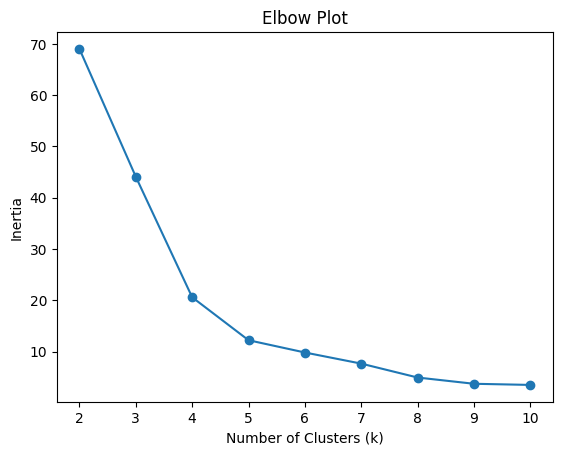

CSV file successfully created: customer_clusters.csv
Shape: (23, 8)


,business_name,recency_days,frequency,avg_purchase_value,loyalty_index,recency_score,value_tier,engagement_score
0,De Majok,110,20,520775.135135,1.041550e+07,0.009009,Medium,0.022237
1,Deeski Store Limited,2,456,235775.480591,1.075136e+08,0.333333,High,0.634921
2,Ecopeaks Limited,3,171,337742.472157,5.775396e+07,0.250000,High,0.363095
3,Ekulo International Limited(Wine world),11,1,9491.500000,9.491500e+03,0.083333,Low,0.083995
4,Extreme Manufacturing Nigeria limited,36,8,8459.000000,6.767200e+04,0.027027,Low,0.032318


In [10]:
plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

output_file = "customer_clusters.csv"
customer_df.to_csv(output_file, index=False)

print("CSV file successfully created:", output_file)
print("Shape:", customer_df.shape)
customer_df.head()

Interpretation: The curve shows a sharp decline in inertia up to k = 4, after which improvements become marginal, indicating diminishing returns.

# Select the optimal number of clusters (k) and justify

The optimal number of clusters selected is k = 4 because it balances cluster compactness and interpretability while avoiding over‑segmentation.

PCA 2D visualisation of the clusters

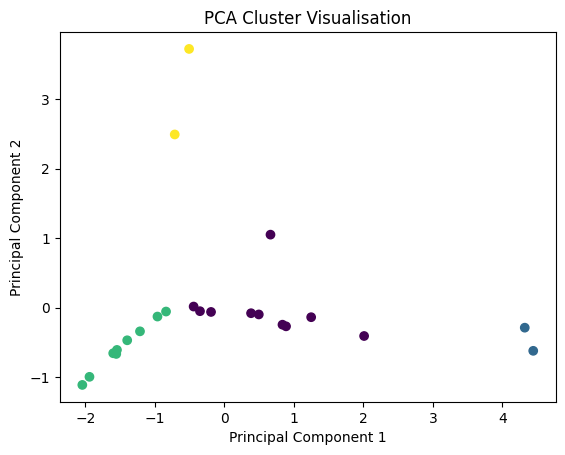

In [14]:
from sklearn.decomposition import PCA

kmeans_final = KMeans(n_clusters=4, random_state=42)
customer_df['cluster'] = kmeans_final.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=customer_df['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Cluster Visualisation')
plt.show()

# Cluster Profile Summary

In [15]:
cluster_profile = customer_df.groupby('cluster')[features].mean()
cluster_profile

,frequency,avg_purchase_value,recency_days,loyalty_index,engagement_score
cluster,,,,,
0,150.200000,7.646260e+05,2.4,4.214862e+07,0.465172
1,664.500000,5.821155e+05,1.0,3.707786e+08,0.939484
2,6.111111,6.991914e+04,56.0,1.213165e+06,0.031843
3,4.000000,1.803387e+07,12.0,6.893600e+07,0.100390


Cluster Interpretation:

Cluster 0 – High‑Value Loyal Businesses: High loyalty index, high frequency, low recency. Key revenue drivers.

Cluster 1 – Active Low‑Spend Buyers: Recent orders but lower spending. Suitable for upselling.

Cluster 2 – Dormant Businesses: High recency days and low engagement. At risk of churn.

Cluster 3 – Moderate Regular Buyers: Average behaviour across all metrics. Growth potential with targeted promotions.